## 2. Finding the Optimal S

In [1]:
import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=UserWarning)

Begin by examining the hybrid sort method using various potential candidate values for ```S```. For each ```S``` value, evaluate the ```sort_time``` and ```key_comparisons``` across arrays of lengths 1 through 100.

In [2]:
from utilities.data_organizer import DataOrganizer

DO = DataOrganizer(batch_count=100)
data = DO.merge_all_batches(data_range_folder="10p0-10p2", data_type="ID")
hybrid_sort_data = data[["length", "array", "order_type"]].copy()

In [3]:
import os
import pandas as pd
from tqdm import tqdm
from time_complexity_analysis.hybrid_sort_tc_analysis import HybridSortTCA

# search_range = list(range(22, 27)) + list(range(45, 56))
search_range = range(2, 22)

In [4]:
def hybrid_sort_analysis(data_range_path: str, data: pd.DataFrame, search_range: list) -> None:

    base_path = os.path.join("data_storage", "hybrid_sort_analysis", data_range_path)

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    for S in tqdm(search_range):

        HSTCA = HybridSortTCA(S=S)
        analysis = HSTCA.hybrid_sort_time_complexity_analysis(data)

        save_path = os.path.join(base_path, f"S-{S}.csv")

        analysis.to_csv(save_path, index=False)

In [6]:
hybrid_sort_analysis("10p-10p2", hybrid_sort_data, search_range)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [02:20<00:00,  7.03s/it]


In [7]:
import pandas as pd

base_path = os.path.join("data_storage", "hybrid_sort_analysis", "10p-10p2")
data_path = os.path.join(base_path, f"S-{search_range[0]}.csv")
data = pd.read_csv(data_path)
hybrid_sort_data = data[["length", "hybrid_sort_key_comparison", 
                         "hybrid_sort_time", "order_type"]].copy()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def comparison_plot(insertion_sort: pd.DataFrame, merge_sort: pd.DataFrame,
             hybrid_sort: pd.DataFrame, order_type: str = None) -> None:
    
    if order_type is not None:
        insertion_sort = insertion_sort[insertion_sort["order_type"] == order_type]
        merge_sort = merge_sort[merge_sort["order_type"] == order_type]
        hybrid_sort = hybrid_sort[hybrid_sort["order_type"] == order_type]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

    # ax1: sort time
    sns.lineplot(x="length", y="insertion_sort_time", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax1)

    sns.lineplot(x="length", y="merge_sort_time", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax1)
    
    sns.lineplot(x="length", y="hybrid_sort_time", data=hybrid_sort,
                label="Hybrid Sort", palette="green", ax=ax1)

    ax1.set_title("Sort Time: Insertion Sort vs. Merge Sort")

    # ax2: key comparison
    sns.lineplot(x="length", y="insertion_sort_key_comparison", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax2)

    sns.lineplot(x="length", y="merge_sort_key_comparison", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax2)
    
    sns.lineplot(x="length", y="hybrid_sort_key_comparison", data=hybrid_sort,
                label="Hybrid Sort", palette="green", ax=ax2)

    ax2.set_title("Key Comparison: Insertion Sort vs. Merge Sort")

    plt.tight_layout()
    plt.legend()
    plt.show()

Here's one sample visualization of the results from Hybrid Sort.

In [9]:
insertion_sort_p0p2, merge_sort_p0p2 = DO.merge_all_batches("10p0-10p2", "TC", split=True)

Plot for **C-i)**

As a sample, S value is fixed to 22. The below are the plots of:
- Array Length vs Sort Time
- Array Length vs Key Comparison

for Best, Average, and Worst cases respectively.

##### Best Case

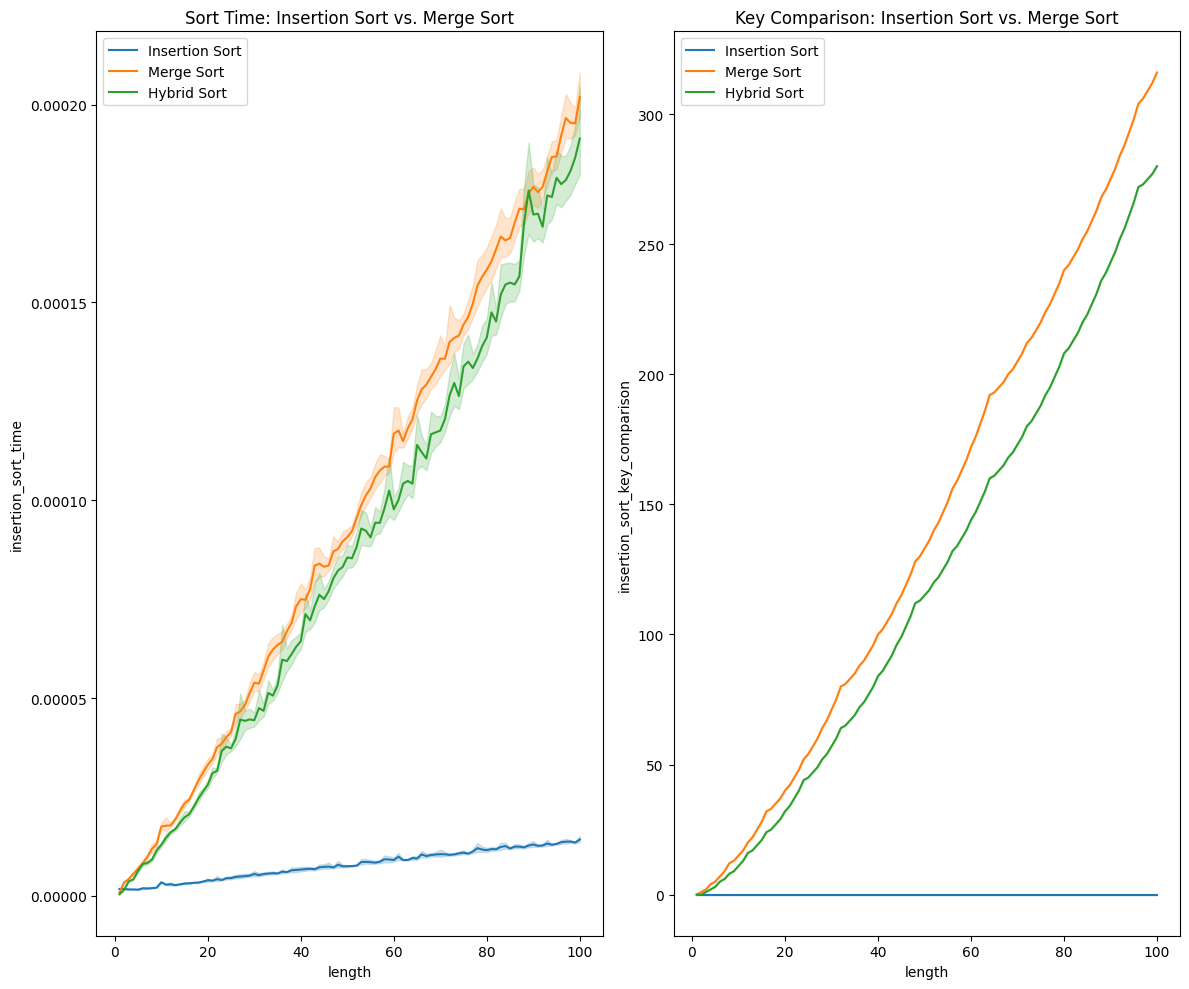

In [10]:
comparison_plot(insertion_sort_p0p2, merge_sort_p0p2, hybrid_sort_data, "ascending")

##### Average Case

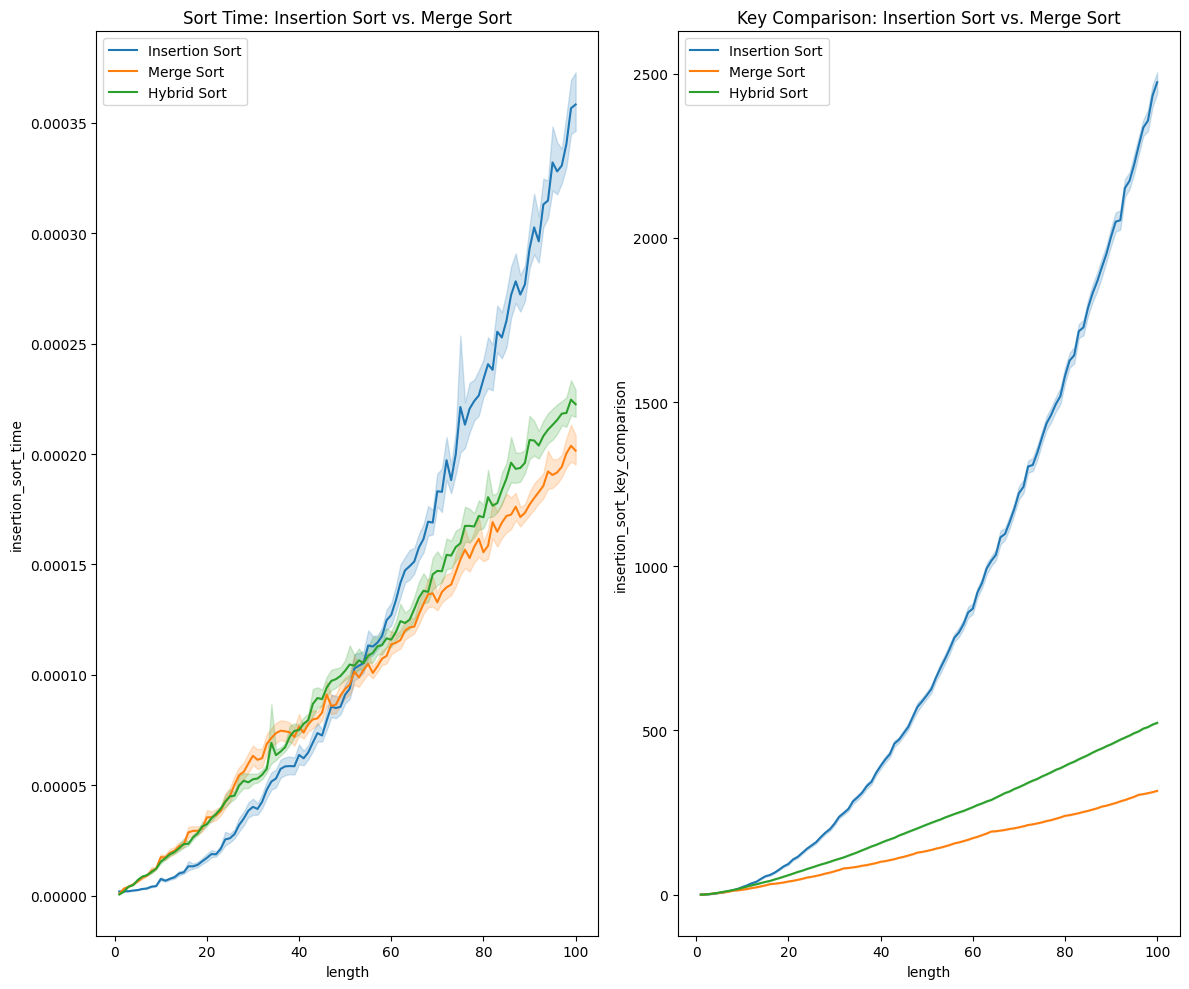

In [11]:
comparison_plot(insertion_sort_p0p2, merge_sort_p0p2, hybrid_sort_data, "random")

##### Worst Case

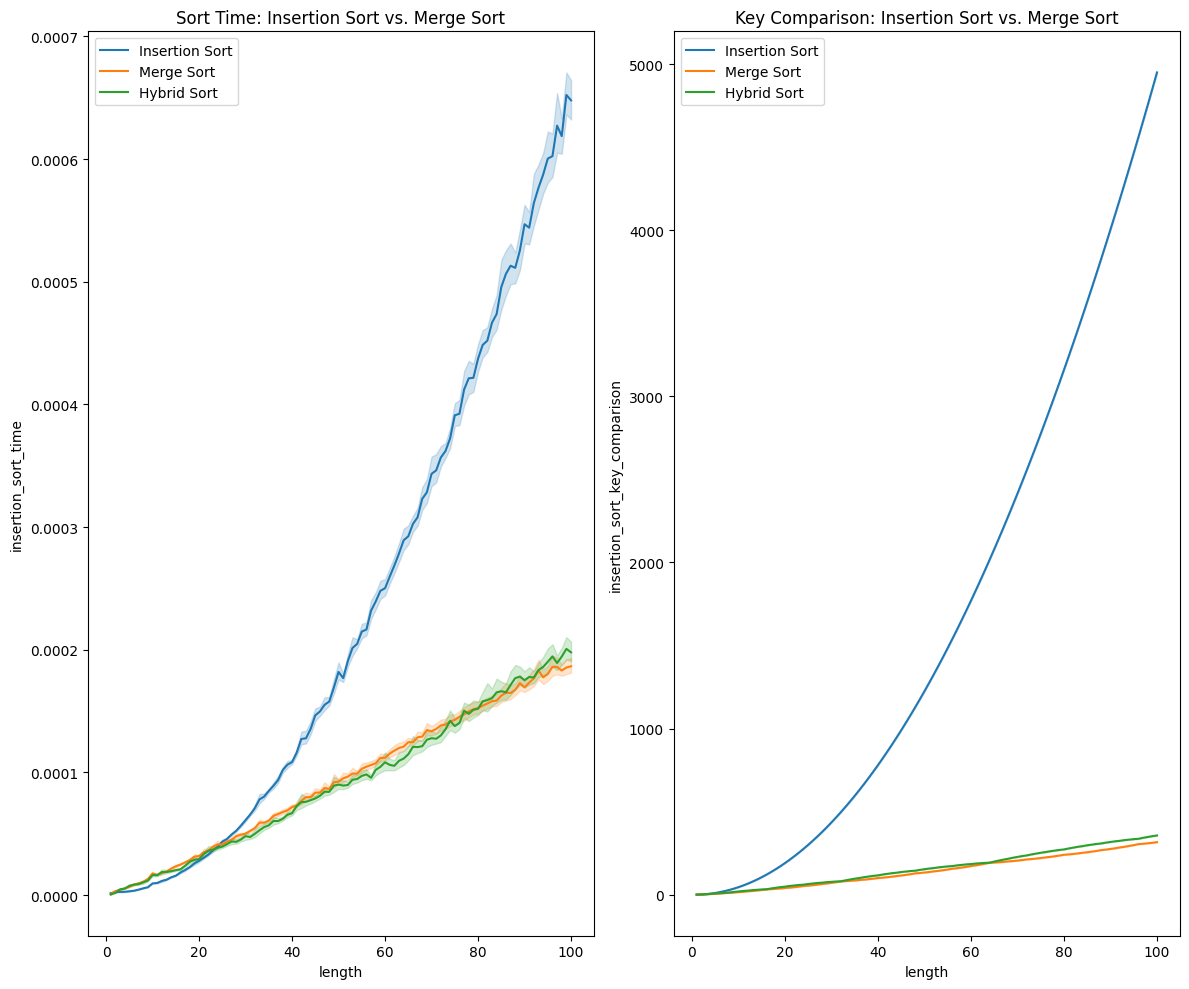

In [12]:
comparison_plot(insertion_sort_p0p2, merge_sort_p0p2, hybrid_sort_data, "descending")

##### Combined

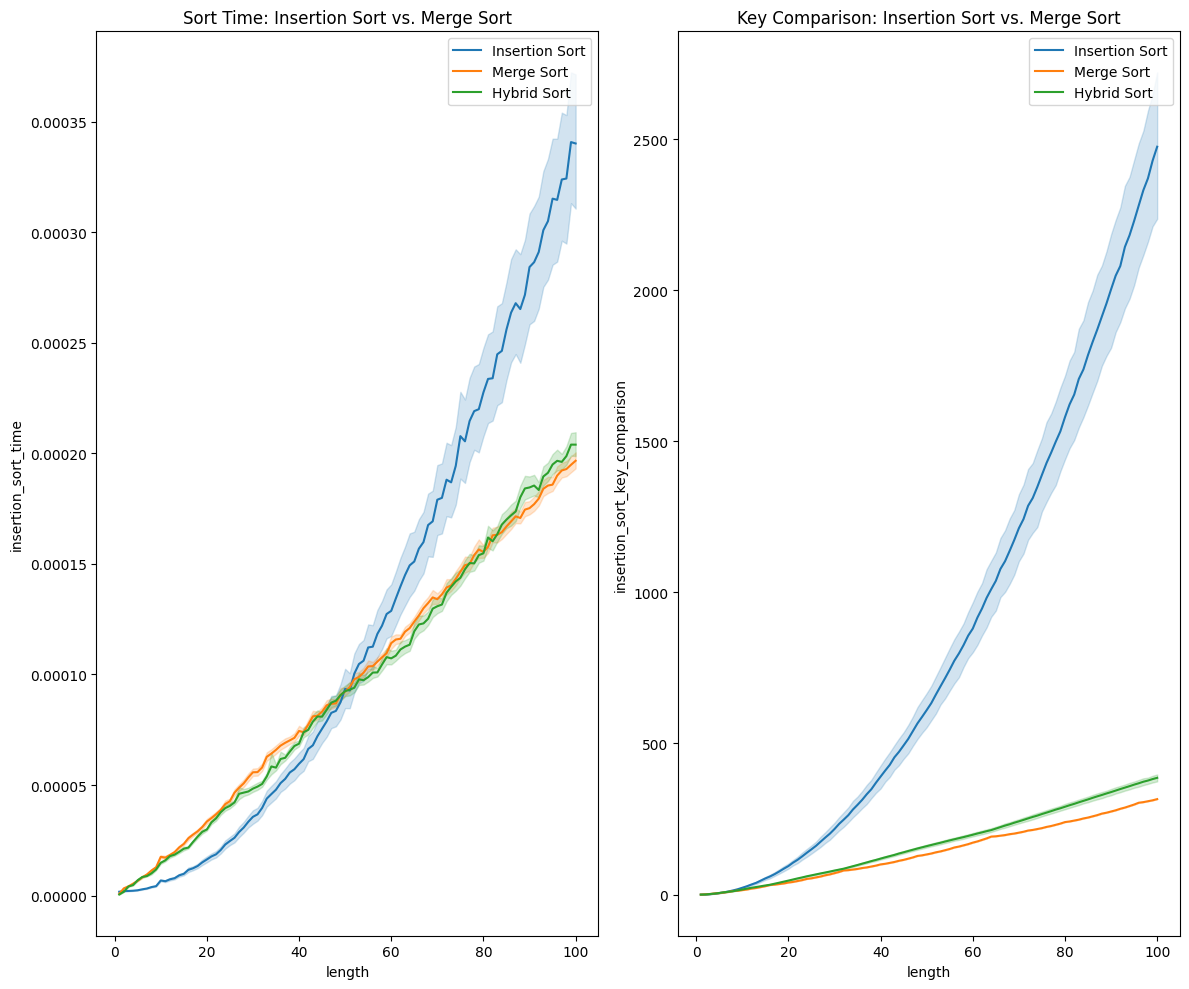

In [13]:
comparison_plot(insertion_sort_p0p2, merge_sort_p0p2, hybrid_sort_data)

In [14]:
def get_average(order_type: str, data_range_folder: str, search_range: list, length: int) -> pd.DataFrame:

    avg_data = []
    base_path = os.path.join("data_storage", "hybrid_sort_analysis", data_range_folder)

    # for i in tqdm(search_range):
    for i in search_range:
        data_path = os.path.join(base_path, f"S-{i}.csv")
        data = pd.read_csv(data_path)

        arr_n = data[(data["length"] == length) & (data["order_type"] == order_type)]
            
        mean_key_comparison = arr_n["hybrid_sort_key_comparison"].mean()
        mean_sort_time = arr_n["hybrid_sort_time"].mean()

        avg_data.append({
            "S": i,
            "length": length,
            "mean_key_comparison": mean_key_comparison,
            "mean_sort_time": mean_sort_time
        })

    return pd.DataFrame(avg_data)

In [15]:
data = DO.merge_all_batches(data_range_folder="10p2-10p3", data_type="ID")
data = data[data["length"] == 1000]
hybrid_sort_data = data[["length", "array", "order_type"]].copy()

In [16]:
hybrid_sort_analysis("10p2-10p3", hybrid_sort_data, search_range)

100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


In [17]:
length = 1000

hybrid_avg_data_best = get_average(
    order_type="ascending", search_range=search_range, 
    data_range_folder="10p2-10p3", length=length)

hybrid_avg_data_avg_l1000 = get_average(
    order_type="random", search_range=search_range, 
    data_range_folder="10p2-10p3", length=length)

hybrid_avg_data_worst = get_average(
    order_type="descending", search_range=search_range, 
    data_range_folder="10p2-10p3", length=length)

In [18]:
insertion_sort_p2p3, merge_sort_p2p3 = DO.merge_all_batches("10p2-10p3", "TC", split=True)

In [19]:
n = 1000
merge_sort_data = merge_sort_p2p3.copy()

# Best Case
merge_ln_best = merge_sort_data[(merge_sort_data["length"] == n) & (merge_sort_data["order_type"] == "ascending")]

mean_merge_key_comparison_best = merge_ln_best["merge_sort_key_comparison"].mean()
mean_merge_sort_time_best = merge_ln_best["merge_sort_time"].mean()

hybrid_avg_data_best["mean_merge_sort_key_comparison"] = mean_merge_key_comparison_best
hybrid_avg_data_best["mean_merge_sort_time"] = mean_merge_sort_time_best

# Average Case
merge_ln_avg = merge_sort_data[(merge_sort_data["length"] == n) & (merge_sort_data["order_type"] == "random")]

mean_merge_key_comparison_avg = merge_ln_avg["merge_sort_key_comparison"].mean()
mean_merge_sort_time_avg = merge_ln_avg["merge_sort_time"].mean()

hybrid_avg_data_avg_l1000["mean_merge_sort_key_comparison"] = mean_merge_key_comparison_avg
hybrid_avg_data_avg_l1000["mean_merge_sort_time"] = mean_merge_sort_time_avg

# Worst Case
merge_ln_worst = merge_sort_data[(merge_sort_data["length"] == n) & (merge_sort_data["order_type"] == "descending")]

mean_merge_key_comparison_worst = merge_ln_worst["merge_sort_key_comparison"].mean()
mean_merge_sort_time_worst = merge_ln_worst["merge_sort_time"].mean()

hybrid_avg_data_worst["mean_merge_sort_key_comparison"] = mean_merge_key_comparison_worst
hybrid_avg_data_worst["mean_merge_sort_time"] = mean_merge_sort_time_worst

In [20]:
def final_comparison_plot(avg_data: pd.DataFrame) -> None:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    legend_loc = "upper right"

    # ax1: mean sort time
    sns.lineplot(x="S", y="mean_sort_time", data=avg_data, 
                label="Hybrid Sort", color="green", ax=ax1, legend=False)
    
    sns.lineplot(x="S", y="mean_merge_sort_time", data=avg_data, 
                label="Merge Sort", color="orange", ax=ax1, legend=False)
    
    ax1.set_title("Avg. Computation Time over different values of S")
    ax1.legend(loc=legend_loc)
    ax1.set_xticks(avg_data["S"].unique())

    # ax2: mean key comparison
    sns.lineplot(x="S", y="mean_key_comparison", data=avg_data, 
                label="Hybrid Sort", color="green", ax=ax2, legend=False)
    
    sns.lineplot(x="S", y="mean_merge_sort_key_comparison", data=avg_data, 
                label="Merge Sort", color="orange", ax=ax2, legend=False)
    
    ax2.set_title("Avg. Key Comparison over different values of S")
    ax2.legend(loc=legend_loc)
    ax2.set_xticks(avg_data["S"].unique())

    plt.tight_layout()
    plt.show()

Plot for **C-ii)**

Array lengths are fixed to 1000, while S values are varied. The below are the plots of:
- S vs Average Sort Time
- S vs Average Key Comparison

for Best, Average, and Worst cases respectively.

##### Best Case

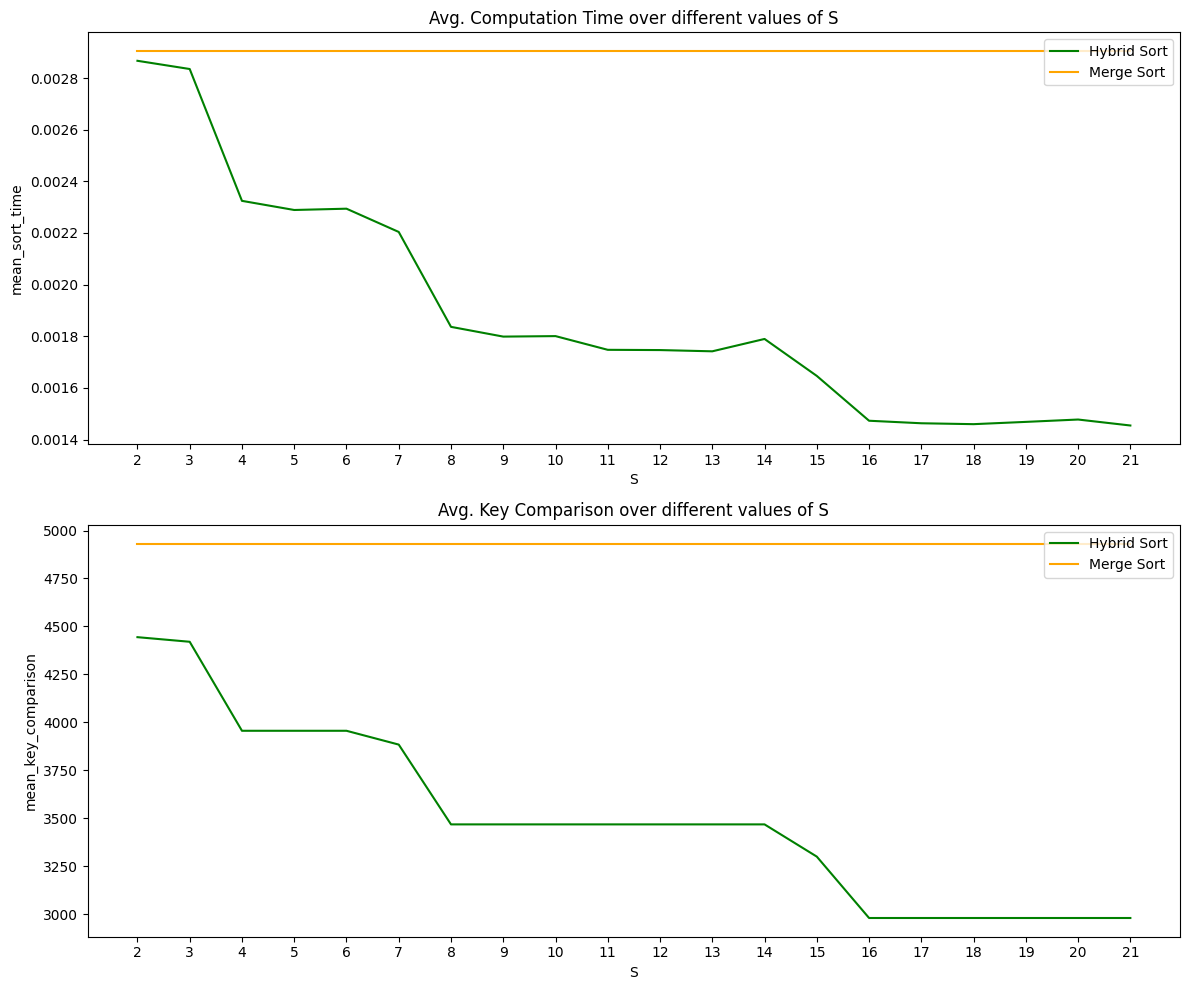

In [21]:
final_comparison_plot(hybrid_avg_data_best)

##### Average Case

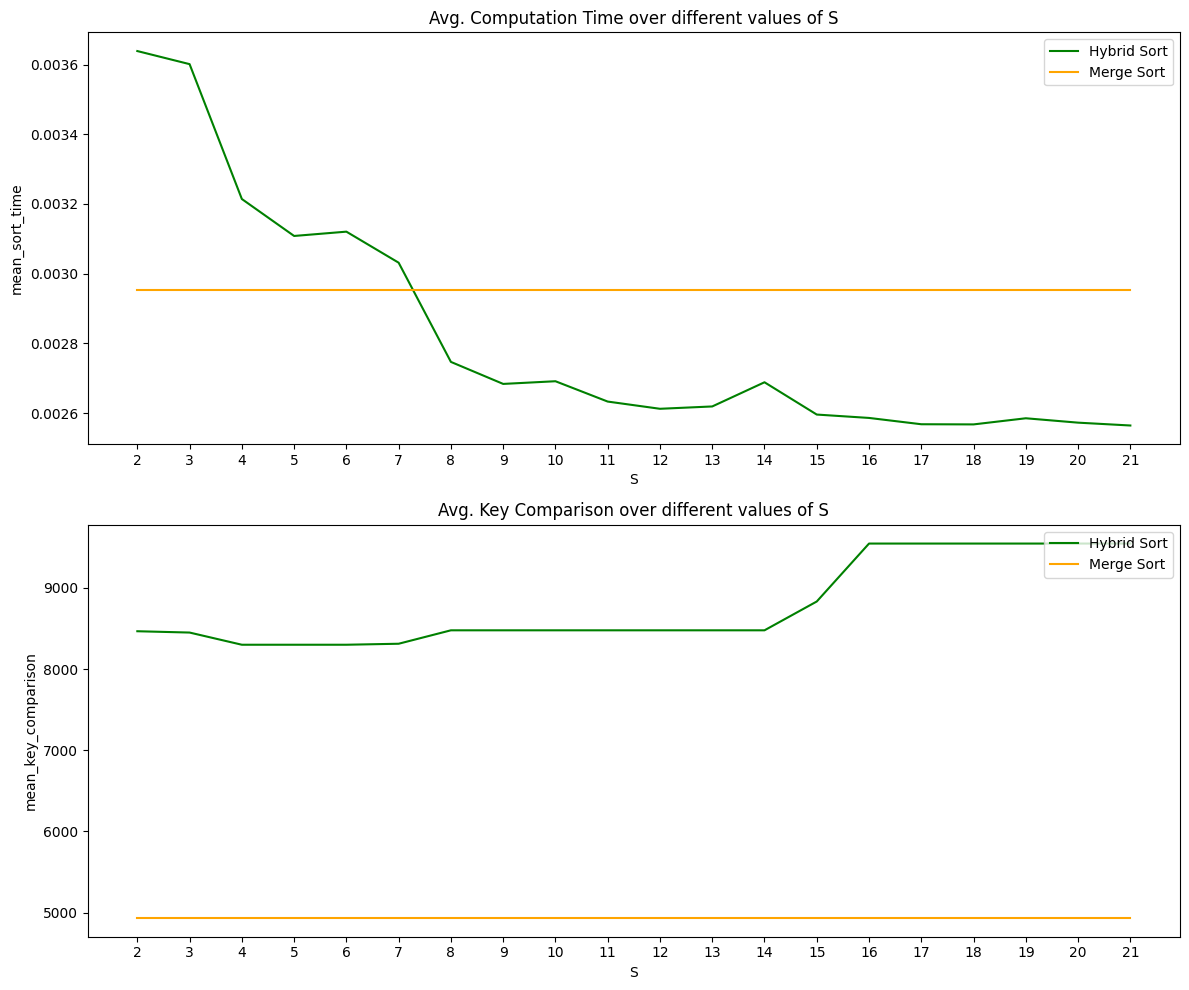

In [22]:
final_comparison_plot(hybrid_avg_data_avg_l1000)

In the **Average Case**, the Hybrid Sort has a shorter ```average_runtime``` compared to Merge Sort, starting from a ```S``` value of ```8```.

##### Worst Case

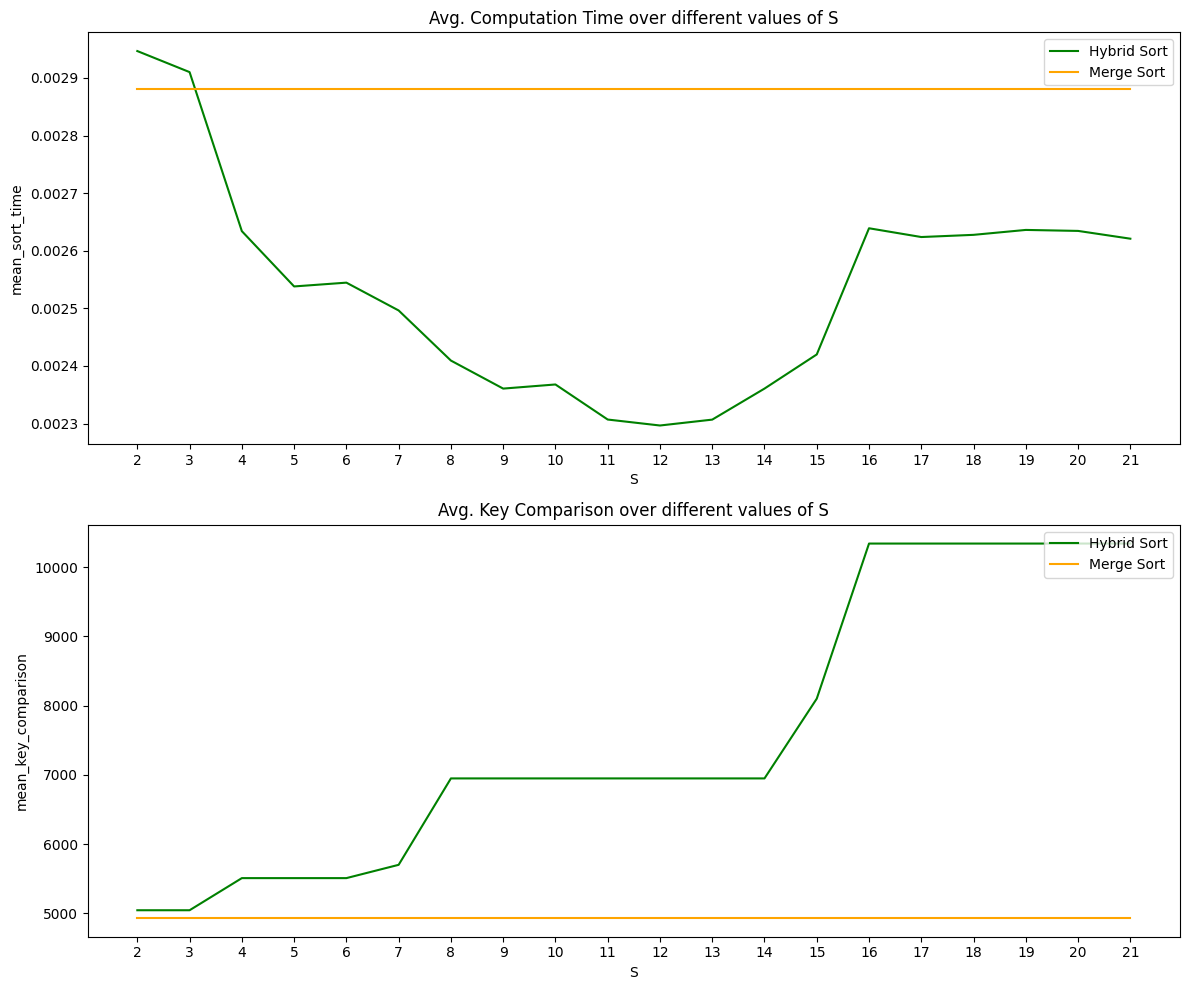

In [23]:
final_comparison_plot(hybrid_avg_data_worst)

In the **Worst Case**, the Hybrid Sort has a shorter ```average_runtime``` compared to Merge Sort, starting from a ```S``` value of ```4```.

The range of exploration for the S value is finalized to: ```8``` to ```22```.

In [36]:
search_range = range(8, 23)

In [37]:
DO = DataOrganizer(batch_count=10)
data = DO.merge_all_batches(data_range_folder="10p3-10p4", data_type="ID")
hybrid_sort_data = data[["length", "array", "order_type"]].copy()

hybrid_sort_analysis("10p3-10p4", hybrid_sort_data, search_range=search_range)

100%|██████████| 15/15 [02:57<00:00, 11.83s/it]


In [38]:
unique_lengths = hybrid_sort_data["length"].unique()

In [39]:
# hybrid_avg_data_avg_agg = pd.DataFrame()
hybrid_avg_data_worst_agg = pd.DataFrame()

for length in tqdm(unique_lengths):
    
    # hybrid_avg_data_avg = get_average(
    #     order_type="random", search_range=search_range, 
    #     data_range_folder="10p3-10p4", length=length)
    
    hybrid_avg_data_worst = get_average(
        order_type="descending", search_range=search_range, 
        data_range_folder="10p3-10p4", length=length)
    
    # hybrid_avg_data_avg_agg = pd.concat([hybrid_avg_data_avg_agg, hybrid_avg_data_avg])
    hybrid_avg_data_worst_agg = pd.concat([hybrid_avg_data_worst_agg, hybrid_avg_data_worst])

# hybrid_avg_data_avg_agg.reset_index(drop=True, inplace=True)
hybrid_avg_data_worst_agg.reset_index(drop=True, inplace=True)

100%|██████████| 51/51 [02:52<00:00,  3.39s/it]


In [68]:
hybrid_avg_data_worst_agg["S"].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [69]:
f = hybrid_avg_data_worst_agg.copy()

hybrid_worst_b1 = f[(f["S"] >= 8) & (f["S"] <= 12)]
hybrid_worst_b2 = f[(f["S"] >= 13) & (f["S"] <= 17)]
hybrid_worst_b3 = f[(f["S"] >= 18) & (f["S"] <= 22)]

In [41]:
insertion_sort_p3p4, merge_sort_p3p4 = DO.merge_all_batches("10p3-10p4", "TC", split=True)

In [42]:
def merge_sort_averages(merge: pd.DataFrame) -> pd.DataFrame:

    # Group by "length" and compute mean for the specified columns
    averages = merge.groupby('length').agg({
        'merge_sort_time': 'mean',
        'merge_sort_key_comparison': 'mean'
    }).reset_index()  # Resetting index to convert "length" back into a column

    # Rename columns for the output dataframe
    averages.columns = ['length', 'mean_sort_time', 'mean_key_comparison']

    return averages

In [43]:
merge_worst = merge_sort_averages(merge_sort_p3p4[merge_sort_p3p4["order_type"] == "descending"])

In [77]:
def final_comparison_plot(hybrid_sort_data: pd.DataFrame, merge_sort_data: pd.DataFrame) -> None:
    
    plt.figure(figsize=(12, 6))
    
    # Hybrid Sort Plot with legend set to False to prevent automatic legends
    sns.lineplot(x="length", 
                 y="mean_sort_time", 
                 hue="S", 
                 palette="plasma",
                 data=hybrid_sort_data,
                 style="S",
                 markers=True,
                 dashes=False,
                 legend=False
                )

    # Merge Sort Plot
    sns.lineplot(x="length",
                 y="mean_sort_time",
                 color="red",
                 data=merge_sort_data,
                 legend=False
                )

    # Create custom legend
    # Fetch colors directly from the lines on the plot
    s_values = sorted(hybrid_sort_data["S"].unique())
    lines = plt.gca().get_lines()
    line_colors = [line.get_color() for line in lines[:len(s_values)]]
    custom_handles = [plt.Line2D([0], [0], color=line_colors[i], marker='o') for i in range(len(s_values))]
    custom_labels = [str(s) for s in s_values]
    
    # Add Merge Sort handle and label
    custom_handles.append(plt.Line2D([0], [0], color="red"))
    custom_labels.append("Merge Sort")

    # Show legend
    plt.legend(handles=custom_handles, labels=custom_labels, title="Algorithm (S value)")

    # Customize the plot attributes
    plt.title("Comparison of Sort Times for Hybrid and Merge Sort")
    plt.xlabel("Array Length")
    plt.ylabel("Sort Time")

    plt.tight_layout()
    plt.show()

Plot for **C-iii)**

Throughout varying array lengths from 1000 to 2000, sorting results with varying ```S```. The below are the plots of:
- Array Length vs Average Sort Time

focusing on the Worst case.

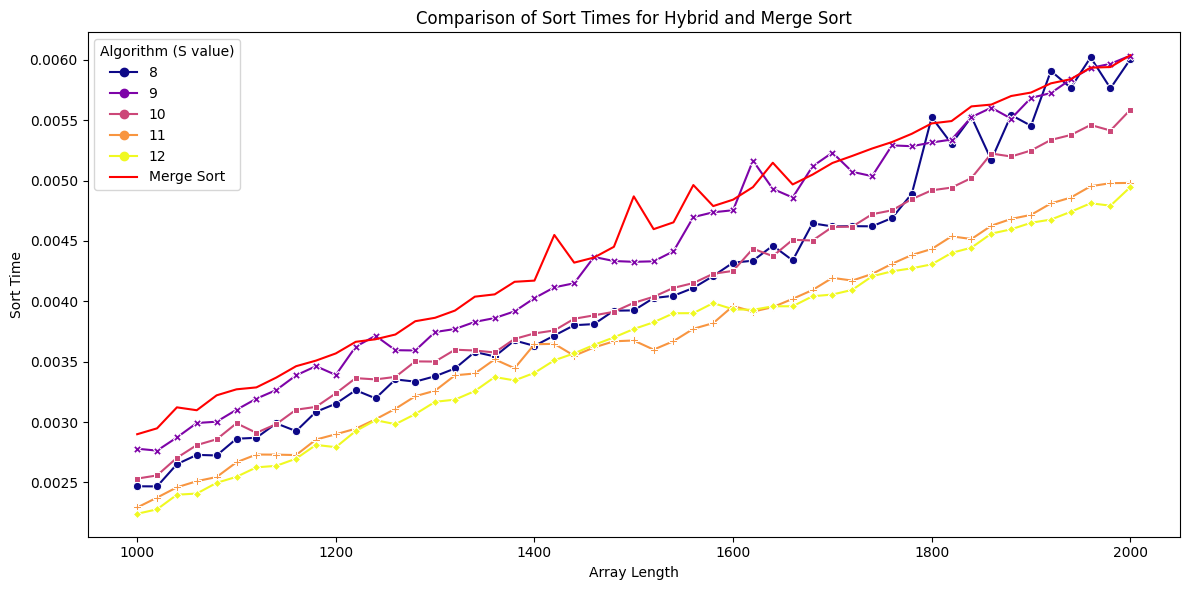

In [78]:
final_comparison_plot(hybrid_worst_b1, merge_worst)

Optimal ```S``` values: ```10```, ```11```, ```12```

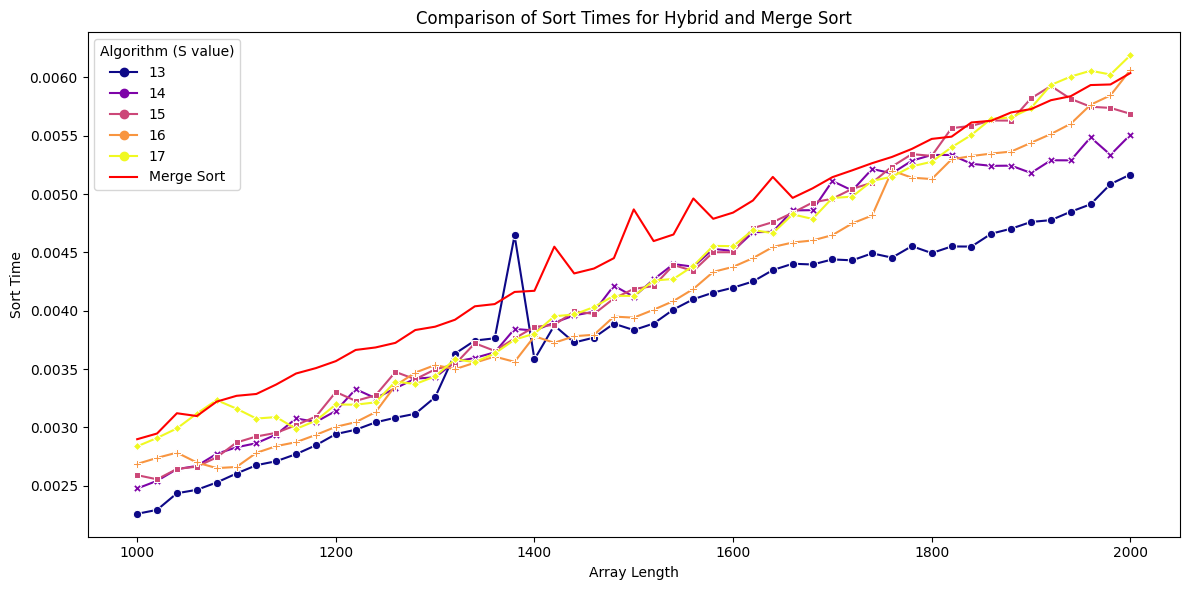

In [79]:
final_comparison_plot(hybrid_worst_b2, merge_worst)

Optimal ```S``` values: ```13```, ```14```

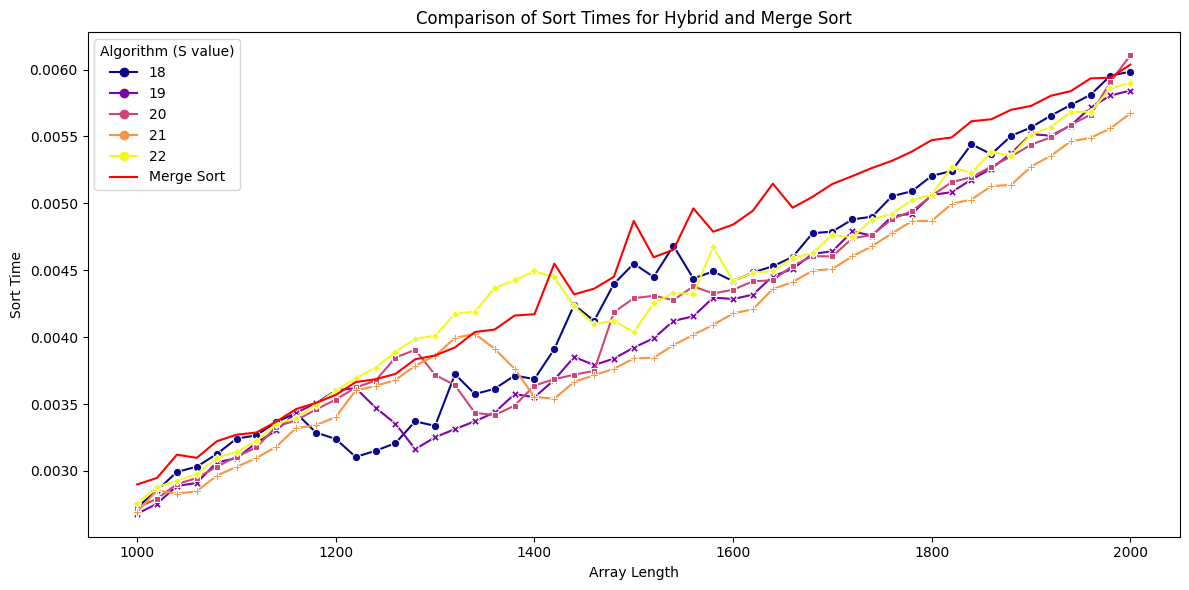

In [80]:
final_comparison_plot(hybrid_worst_b3, merge_worst)

Optimal ```S``` values: ```19```, ```21```. But these will be off the list of ```S``` options.

Summing up, the selections for Optimal ```S``` are: ```10```, ```11```, ```12```, ```13```, ```14```

Ranging in between ```10``` to ```14```